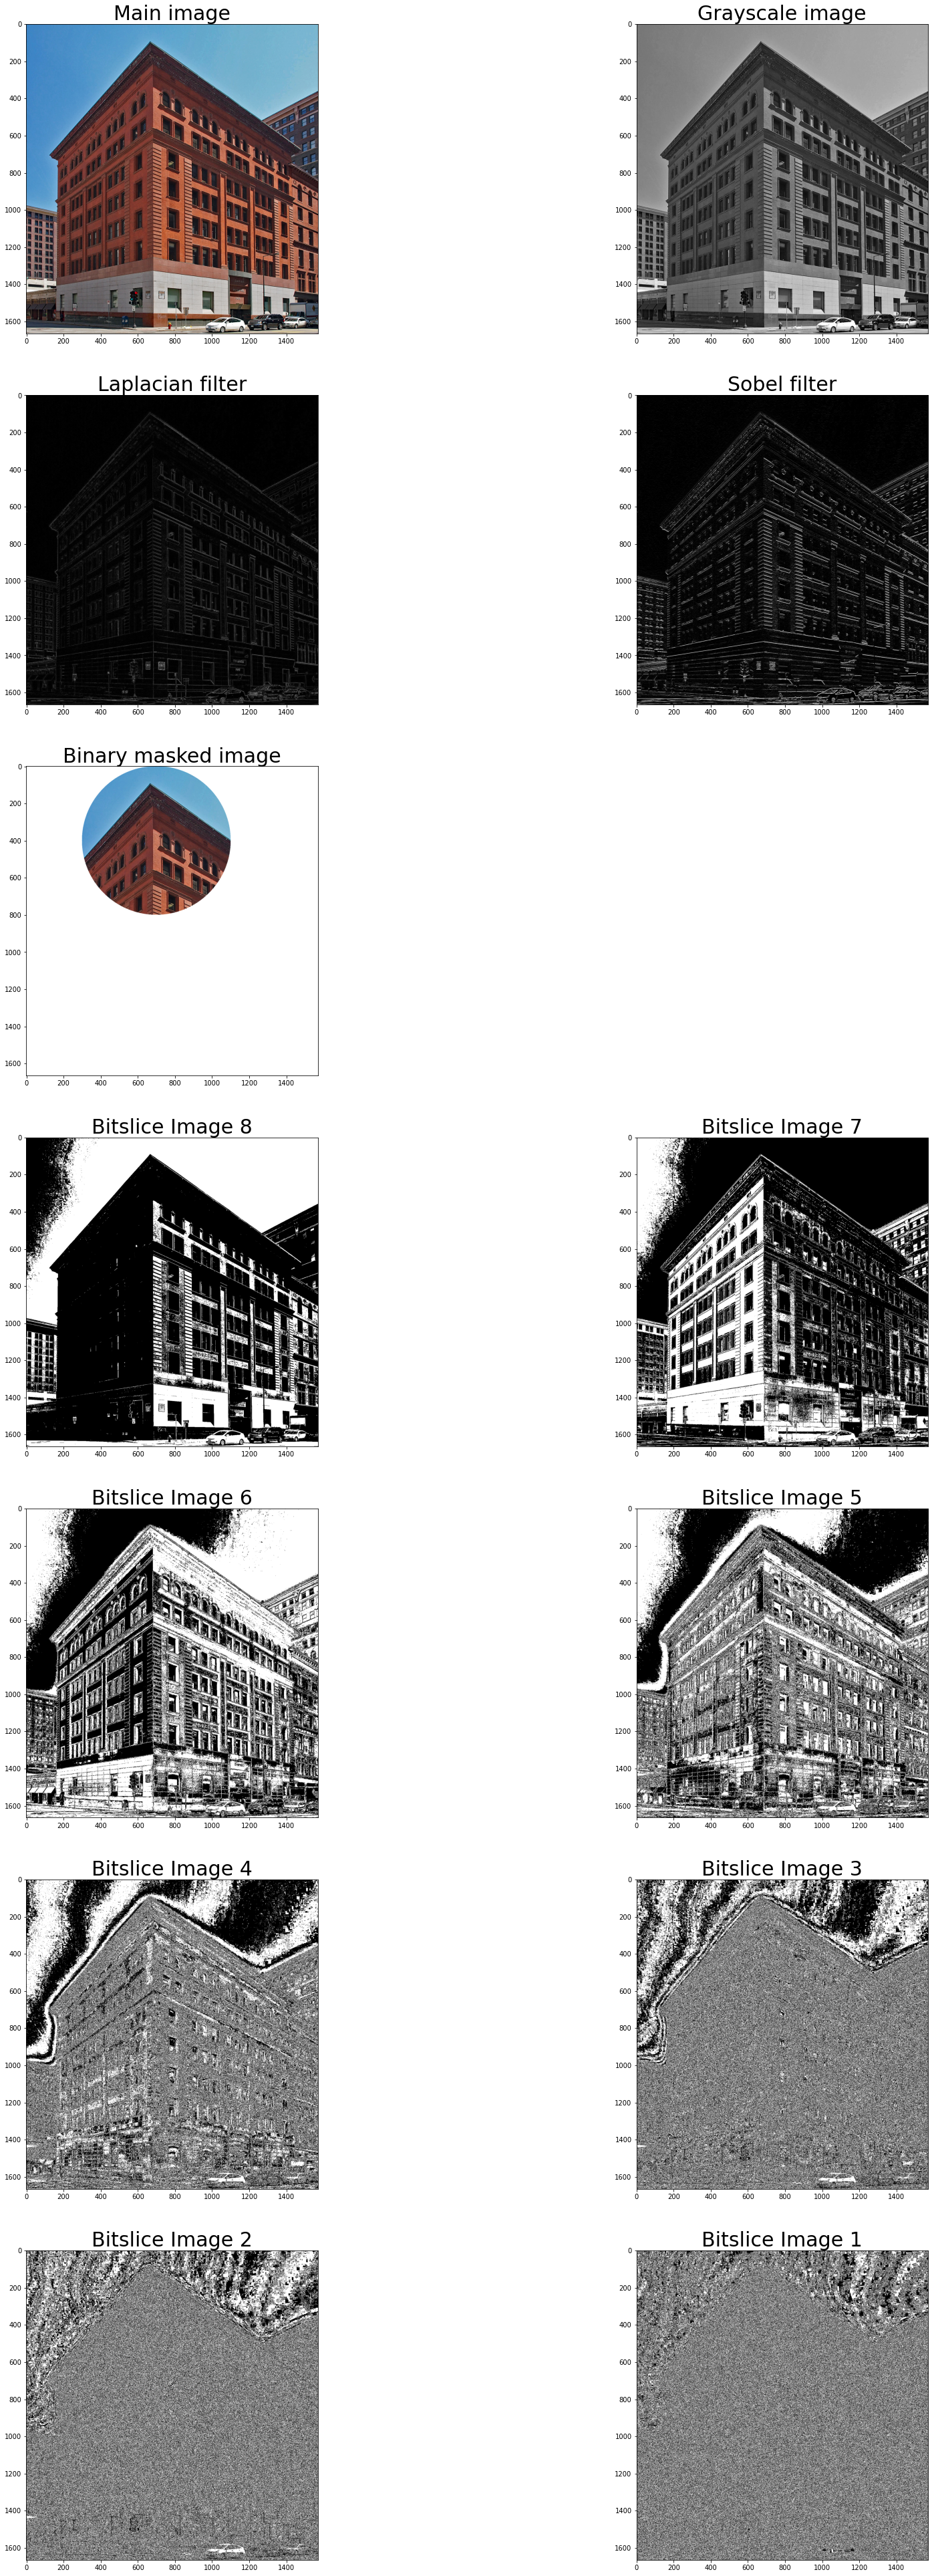

In [7]:
import matplotlib.pyplot as plt
import cv2
import numpy as np


def main():
    img_path = './image.jpg'
    image = plt.imread(img_path)
    # print(image)

    subPlotX, subPlotY = 8, 2

    plt.figure(figsize = (30, 80))

    grayscale_img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    lap_kernel = np.array([[0,1,0], [1,-4,1], [0,1,0]])
    grayscale_img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    filter1_img = cv2.filter2D(grayscale_img, -1, lap_kernel)
    
    sobel_kernel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    grayscale_img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    filter2_img = cv2.filter2D(grayscale_img, -1, sobel_kernel)
    
    image = plt.imread(img_path)
    binary_mask = np.zeros(image.shape, dtype=np.uint8)
    binary_mask = cv2.circle(binary_mask, (700, 400), 400, (255,255,255), -1)
    
    mask_img = cv2.bitwise_and(image, binary_mask)
    mask_img[binary_mask==0] = 255
    
    w, h = grayscale_img.shape
    bit_mat = np.zeros((8,w,h), dtype=int)
    bits = [1,2,4,8,16,32,64,128]
    
    for k in range(8):
        for i in range(w):
            for j in range(h):
                bit_mat[k][i][j] = grayscale_img[i][j] & bits[k]
    k = 7
    
    for m in range(7,15):
        plt.subplot(subPlotX, subPlotY, m)
        plt.title('Bitslice Image '+str(k+1), fontsize=30)
        plt.imshow(bit_mat[k], cmap='gray')
        k = k - 1
            
    
    plt.subplot(subPlotX, subPlotY, 1)
    plt.title('Main image', fontsize=30)
    plt.imshow(image)

    plt.subplot(subPlotX, subPlotY, 2)
    plt.title('Grayscale image', fontsize=30)
    plt.imshow(grayscale_img, cmap='gray')

    plt.subplot(subPlotX, subPlotY, 3)
    plt.title('Laplacian filter', fontsize = 30)
    plt.imshow(filter1_img, cmap = 'gray')

    plt.subplot(subPlotX, subPlotY, 4)
    plt.title('Sobel filter', fontsize = 30)
    plt.imshow(filter2_img, cmap = 'gray')
    
    plt.subplot(subPlotX, subPlotY, 5)
    plt.title('Binary masked image', fontsize = 30)
    plt.imshow(mask_img)

    plt.savefig('processed-image.png')
    
if __name__ == '__main__':
    main()